# 3. Exploratory Analysis
Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. - By Wikipedia

Let's see if we can identify some patterns with exploratory analysis

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
df_train = pd.read_csv("../../data/Titanic/train.csv")

In [4]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


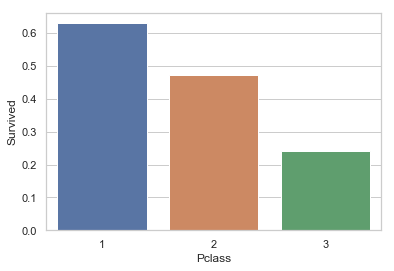

In [5]:
# Pclass
#df_train[['Pclass', 'Survived']].sort_values(by='Pclass')
df_plass = df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean()
df_plass
ax = sns.barplot(x=df_plass.index, y="Survived", data=df_plass)

###### It seems Pclass is higher, the survival rate is higher. 

In [108]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

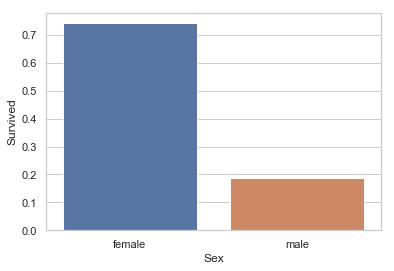

In [9]:
# Sex
df_sex = df_train[['Sex', 'Survived']].groupby(['Sex']).mean()
ax = sns.barplot(x=df_sex.index, y="Survived", data=df_sex)

###### Ladies goes first

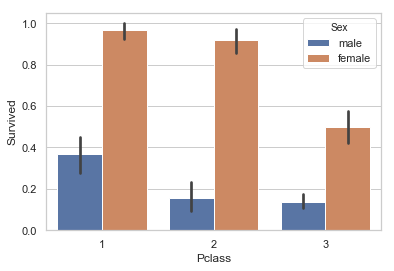

In [11]:
# Pclass & Sex
df_class_sex = df_train[['Pclass','Sex', 'Survived']]
df_class_sex
ax = sns.barplot(x='Pclass', y="Survived", hue='Sex', data=df_class_sex)

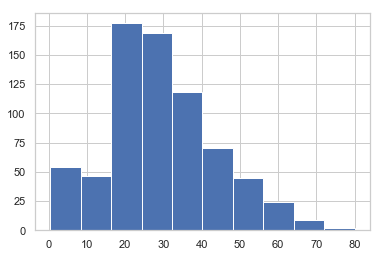

In [6]:
# Age distribution
df_train['Age'].hist(bins=10)

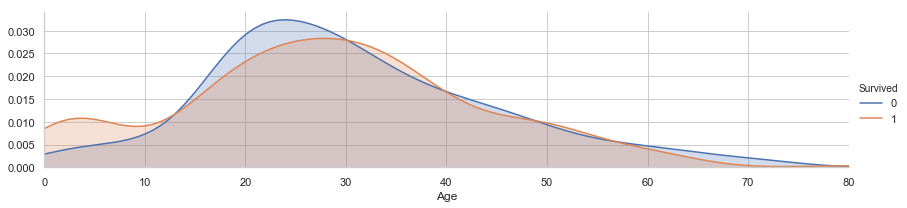

In [15]:
# Survived & not survived under different ages
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

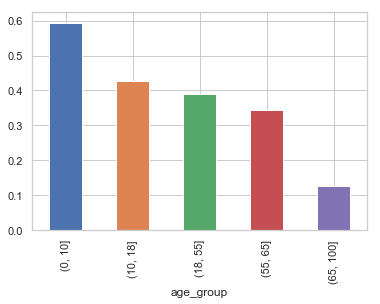

In [33]:
# if we split the data into different age groups
bins = [0, 10, 18,  55, 65, 100]
df_train['age_group'] = pd.cut(df_train['Age'], bins)
age_group = df_train.groupby('age_group')['Survived'].mean()
age_group.plot(kind='bar')

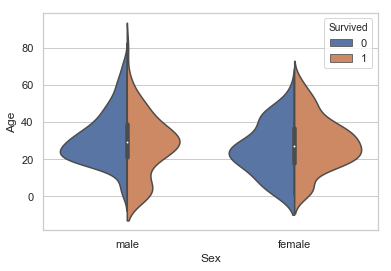

In [12]:
# Age & Sex
df_age_sex = df_train[['Sex','Age', 'Survived']]
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_age_sex,split=True)

###### SibSp

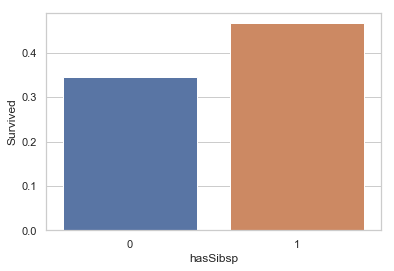

In [47]:
df_train['SibSp'].value_counts()
df_train['hasSibsp'] = df_train['SibSp'].apply(lambda x: 0 if x==0 else 1)
sibsp_df = df_train[['hasSibsp', 'Survived']].groupby('hasSibsp').mean()
sns.barplot(x=sibsp_df.index, y='Survived', data=sibsp_df) 

###### Parch

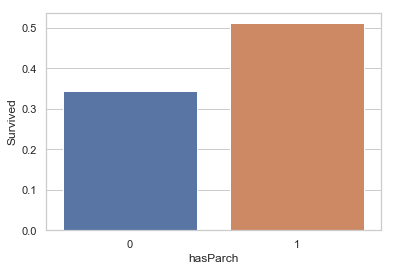

In [48]:
df_train['Parch'].value_counts()
df_train['hasParch'] = df_train['Parch'].apply(lambda x: 0 if x==0 else 1)
parch_df = df_train[['hasParch', 'Survived']].groupby('hasParch').mean()
sns.barplot(x=parch_df.index, y='Survived', data=parch_df) 

###### Fare

In [62]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

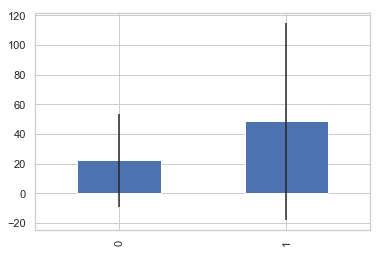

In [67]:
fare_not_survived = df_train['Fare'][df_train['Survived'] == 0]
fare_survived = df_train['Fare'][df_train['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
average_fare.plot(yerr=std_fare, kind='bar', legend=False)

plt.show()

In [68]:
print(average_fare)
print(std_fare)

           0
0  22.117887
1  48.395408
           0
0  31.388207
1  66.596998


###### Cabin 缺失值比较多，这里不做分析

###### Embarked

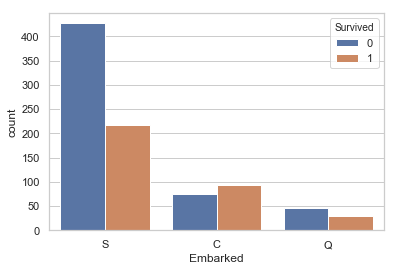

In [49]:
sns.countplot('Embarked', hue='Survived', data=df_train)

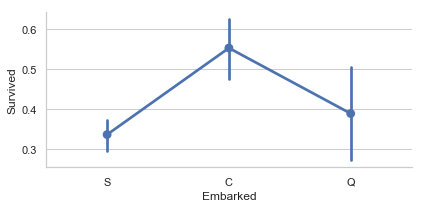

In [60]:
sns.catplot('Embarked', 'Survived', data=df_train, height=3, aspect=2, kind='point')

**C: Highest survival rate, S: lowest survival rate**